In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

/Users/RyanSampana/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('./data/carpdata.csv')

In [3]:
df.head()

,Unnamed: 0,species,huc8,day,month,date,decimalLatitude,decimalLongitude,status
0,0,molitrix,3150110,1,10,1984-10-1,32.606700,-85.889600,failed
1,1,molitrix,3150110,7,11,1986-11-7,32.606700,-85.889600,failed
2,2,molitrix,3150110,25,9,1984-9-25,32.612592,-85.879784,failed
3,3,molitrix,3160100,25,9,1996-9-25,33.643054,-87.897980,failed
4,4,molitrix,8020303,25,9,1975-9-25,34.488519,-91.254416,established


In [4]:
df.columns = [u'id', u'species', u'huc8', u'day', u'month', u'date',
       u'decimalLatitude', u'decimalLongitude', u'status']

In [5]:
df.head()

,id,species,huc8,day,month,date,decimalLatitude,decimalLongitude,status
0,0,molitrix,3150110,1,10,1984-10-1,32.606700,-85.889600,failed
1,1,molitrix,3150110,7,11,1986-11-7,32.606700,-85.889600,failed
2,2,molitrix,3150110,25,9,1984-9-25,32.612592,-85.879784,failed
3,3,molitrix,3160100,25,9,1996-9-25,33.643054,-87.897980,failed
4,4,molitrix,8020303,25,9,1975-9-25,34.488519,-91.254416,established


In [6]:
df[df['date'] == '2010-9']

,id,species,huc8,day,month,date,decimalLatitude,decimalLongitude,status
300,300,molitrix,10240011,0,9,2010-9,39.45594,-95.03252,established
301,301,molitrix,10240008,0,9,2010-9,39.92418,-95.65822,established
302,302,molitrix,10240008,0,9,2010-9,39.92786,-95.66912,established
303,303,molitrix,10240008,0,9,2010-9,39.89952,-95.72817,established
304,304,molitrix,10240005,0,9,2010-9,39.99217,-95.31451,established
305,305,molitrix,10240005,0,9,2010-9,39.97907,-95.29464,established
306,306,molitrix,10240005,0,9,2010-9,39.94781,-95.25710,established
307,307,molitrix,10240005,0,9,2010-9,39.94202,-95.25358,established


In [7]:
x = pd.to_datetime(df['date'])
y = []
for i in range(len(x)):
    y.append(datetime.datetime.strptime(str(x[i]),'%Y-%m-%d %H:%M:%S'))

In [8]:
ys = []
for i in range(len(y)):
    ys.append(y[i].year)

In [9]:
df['date'] = ys

### There are some data points which have day = 0. This is an error so we will probably just use date and month to classify

In [10]:
df[df['day'] == 0]

,id,species,huc8,day,month,date,decimalLatitude,decimalLongitude,status
300,300,molitrix,10240011,0,9,2010,39.45594,-95.03252,established
301,301,molitrix,10240008,0,9,2010,39.92418,-95.65822,established
302,302,molitrix,10240008,0,9,2010,39.92786,-95.66912,established
303,303,molitrix,10240008,0,9,2010,39.89952,-95.72817,established
304,304,molitrix,10240005,0,9,2010,39.99217,-95.31451,established
305,305,molitrix,10240005,0,9,2010,39.97907,-95.29464,established
306,306,molitrix,10240005,0,9,2010,39.94781,-95.25710,established
307,307,molitrix,10240005,0,9,2010,39.94202,-95.25358,established


# Okay so we are done with general data clean up

In [11]:
established = df[df['status'] == 'established']
established = established[['decimalLatitude','decimalLongitude','date']]
not_established = df[df['status'] != 'established']
not_established = not_established[['decimalLatitude','decimalLongitude','date']]
print "# established =",len(established)
print "# not established =", len(not_established)

# established = 2154
# not established = 148


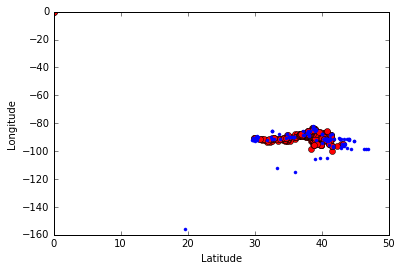

In [12]:
plt.figure()
plt.plot(established['decimalLatitude'],established['decimalLongitude'],'ro',label = 'established')
plt.plot(not_established['decimalLatitude'],not_established['decimalLongitude'],'b.',label='not established')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

## Looks like we have some outliers.. lets remove that! things seem to cluster between latitdue = [25,50]

(25, 50)

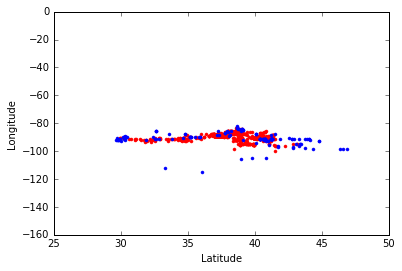

In [13]:
plt.figure()
plt.plot(established['decimalLatitude'],established['decimalLongitude'],'r.',label = 'established')
plt.plot(not_established['decimalLatitude'],not_established['decimalLongitude'],'b.',label='not established')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
# 
plt.xlim([25,50])

## Now lets place this in 3D with the year of the sighting as the third dimension

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:
%matplotlib notebook

<IPython.core.display.Javascript object>


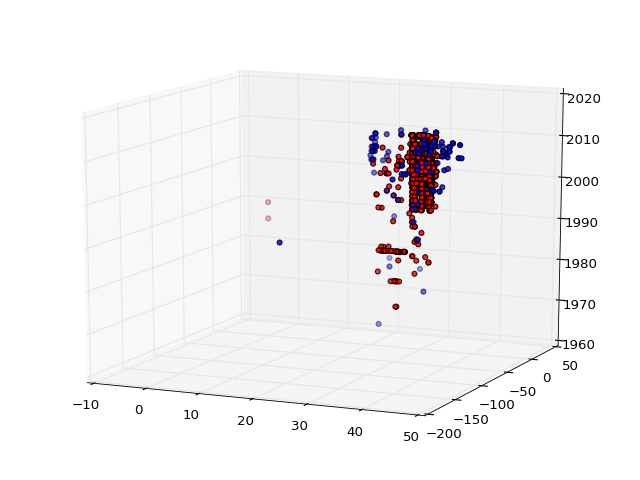

In [16]:
fig = plt.figure(2)

plt.clf()
ax = Axes3D(fig)
plt.cla()
ax.scatter(established['decimalLatitude'],established['decimalLongitude'],established['date'],c='r',marker='o')
ax.scatter(not_established['decimalLatitude'],not_established['decimalLongitude'],not_established['date'],c='b',marker='o')
plt.show()

# First test

## We notice that we have more established sightings of carp than not established. We define established as the sighting of a carp and not established as the l

In [17]:
from sklearn.cluster import KMeans

In [18]:
X = df[['decimalLatitude','decimalLongitude']]
X = X[X['decimalLatitude'] >=23]
X = np.array(X)
labels = df[df['decimalLatitude'] >= 23]
labels = labels['status']
labels = np.array(labels)

In [19]:
kmeans = KMeans(n_clusters=2,n_init=1000, random_state=0).fit(X)
print kmeans.cluster_centers_
predictions = kmeans.predict(X)
true_labels = []
for label in labels:
    if label == 'established':
        true_labels.append(1)
    else:
        true_labels.append(0)

[[ 39.95432992 -90.55373365]
 [ 36.70310376 -88.84951906]]


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(true_labels,predictions)

0.30882992605480641

# Lets try to classify with vector [Latitude, Longitude, Year]

In [21]:
X = df[['decimalLatitude','decimalLongitude','date']]
X = X[X['decimalLatitude'] >=23]
X = np.array(X)
labels = df[df['decimalLatitude'] >= 23]
labels = labels['status']
labels = np.array(labels)

In [22]:
kmeans = KMeans(n_clusters=2,n_init=1000, random_state=0).fit(X)
print kmeans.cluster_centers_
predictions = kmeans.predict(X)
true_labels = []
for label in labels:
    if label == 'established':
        true_labels.append(1)
    else:
        true_labels.append(0)

[[   39.06050292   -89.89269719  2009.25160537]
 [   38.67790693   -90.4474214   2000.22696246]]


In [23]:
accuracy_score(true_labels,predictions)

0.29621574597651151

# Lets split the data by year and classify by space

In [24]:
df = df[df['decimalLatitude'] >= 23]
dates = np.unique(df['date'])
date_table = []
length = []
accuracies = []
for date in dates:
    X = df[df['date'] == date]
    X = X[['decimalLatitude','decimalLongitude']]
    X = np.array(X)
    
    if len(X) == 1:
        pass
    else:
        labels = df[df['date'] == date]
        labels = np.array(labels['status'])
        true_labels = []
        for label in labels:
            if label == 'established':
                true_labels.append(1)
            else:
                true_labels.append(0)
        kmeans = KMeans(n_clusters=2,n_init=1000, random_state=0).fit(X)
        predictions = kmeans.predict(X)
        accuracy = accuracy_score(true_labels,predictions)
        accuracies.append(accuracy)
        date_table.append(date)
        length.append(len(X))      

In [25]:
results = pd.DataFrame([date_table,length,accuracies])
results = results.T
results.columns = ['date','dataSize','accuracy']
results.set_index('date')

,dataSize,accuracy
date,,
1975.0,2.0,0.500000
1981.0,7.0,0.142857
1983.0,2.0,0.500000
1984.0,3.0,0.666667
1986.0,5.0,0.000000
1987.0,3.0,0.666667
1988.0,31.0,0.580645
1989.0,3.0,0.333333
1991.0,3.0,0.666667


<IPython.core.display.Javascript object>


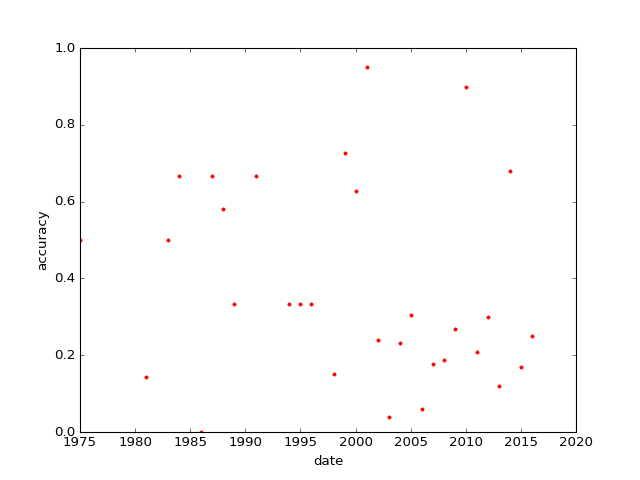

In [26]:
plt.figure()
plt.plot(date_table,accuracies,'r.')
plt.xlabel('date')
plt.ylabel('accuracy')

# Baseline classifiers (NaiveBayes)

In [27]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB

In [28]:
# prepare the data
X = df[['decimalLatitude','decimalLongitude']]
X = X[X['decimalLatitude'] >=23]
X = np.array(X)
labels = df[df['decimalLatitude'] >= 23]
labels = labels['status']
labels = np.array(labels)
true_labels = []
for label in labels:
    if label == 'established':
        true_labels.append(1)
    else:
        true_labels.append(0)

In [29]:
bagOfModels = {
    "linear" : linear_model.LinearRegression(),
    "logistic": linear_model.LogisticRegression(),
    "naive" : GaussianNB()
}
linear = linear_model.LinearRegression()
logistic = linear_model.LogisticRegression()
bayes = GaussianNB()

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, true_labels, test_size=0.33, random_state=1332)

In [31]:
linear.fit(X_train,y_train)
bayes.fit(X_train,y_train)

GaussianNB(priors=None)

In [32]:
l_predict = linear.predict(X_test)

In [33]:
b_predict = bayes.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test,b_predict)
print accuracy

0.919631093544


# Accuracy = 0.919631093544

# Making Joins

In [54]:
carp_final = pd.read_csv('./data/carp_data_final.csv')
gl_final_data = pd.read_excel('./data/GL_Final_Data.xls',sheetname='GL_Final_Data')
AC_In_GreatLakes = pd.read_excel('./data/GL_Final_Data.xls',sheetname='AC_In_GreatLakes')
Temperature = pd.read_excel('./data/GL_Final_Data.xls',sheetname='Temperature')
Miss_AC_Final_Data = pd.read_excel('./data/Miss_AC_Final_Data.xlsx',sheetname = 'Miss_AC_Final_Data')
AC_Data = pd.read_excel('./data/Miss_AC_Final_Data.xlsx',sheetname = 'AC_Data')

In [44]:
print len(gl_final_data)
gl_final_data.head()

17268


,Reach_FID,ARC_ID,AC_FID,Mean_Temp,Mean_Flow,AVG_SLOPE
0,0,209789,NaN,14.351107,3454.574924,4.989080
1,1,158612,NaN,13.424999,223.539864,1.201498
2,2,158685,NaN,13.424999,197.375828,0.362515
3,3,158759,NaN,13.236931,146.128907,1.228509
4,4,158760,NaN,13.236239,139.193417,0.398837


In [95]:
ac_fid = []
for x in range(len(gl_final_data)):
    if str(gl_final_data['AC_FID'].iloc[x]) == 'nan': 
        pass
    else:
        ac_fid.append(x)

In [45]:
print len(AC_In_GreatLakes)
AC_In_GreatLakes.head()

39


,Reach_FID,ARC_ID,UP_CELLS,Mean_Flow,AC_FID,Distance (radius = 1000m),Specimen_ID,Common_Name,Variety,Year,State,County,Locality,HUC8_number,Latitude,Longitude,Status
0,12033,288969,2304,1.650683e+03,25,150.850368,850307,Grass Carp,NaN,2003,ONT,,"Don River in Toronto, Ontario, Canada",4150200,43.654310,-79.350210,unknown
1,12531,292305,6352,1.287725e+04,1,32.749638,35515,Grass Carp,NaN,1980,MI,Newaygo,Little Muskegon River (?) [See Atlas],4060102,43.443447,-85.649071,stocked
2,13406,297786,39977,3.005557e+04,4,310.351260,39465,Grass Carp,NaN,1985,NY,Monroe,pond in Rochester at Barge Canal/Genesee River...,4130001,43.121535,-77.642183,stocked
3,13475,298084,2094,1.413551e+03,117,458.279693,877688,Grass Carp,diploid,2015,ONT,,"Lake Ontario, Jordan Harbour, St. Catharines, ...",4150200,43.179490,-79.378550,unknown
4,13512,298235,4525696,3.801731e+06,52,444.825282,879664,Grass Carp,NaN,2015,ONT,,Niagara River at Niagara Whirlpool,4120104,43.120830,-79.070000,unknown


In [48]:
print len(Temperature)
Temperature.head()

17268


,FID,ARC_ID,UP_CELLS,Mean_Temp
0,0,209789,4225,14.351107
1,1,158612,233,13.424999
2,2,158685,147,13.424999
3,3,158759,115,13.236931
4,4,158760,171,13.236239


In [49]:
print len(Miss_AC_Final_Data)
Miss_AC_Final_Data.head()

81128


,REACH_FID,ARC_ID,AC_FID,Mean_Temp,Mean_Flow,AVG_SLOPE
0,0,178265,NaN,14.014393,137.576369,0.724375
1,1,178266,NaN,14.076810,144.034793,0.473618
2,2,178522,NaN,14.149758,212.794028,1.237266
3,3,178523,NaN,14.159787,314.682018,0.536078
4,4,178597,NaN,14.190625,567.500000,0.000028


In [52]:
print len(AC_Data)
print np.unique(AC_Data['Common_Name'])
AC_Data.head()

779
[u'Bighead Carp' u'Black Carp' u'Grass Carp' u'Silver Carp']


,REACH_FID,ARC_ID,AC_FID,Distance (carp to river),Specimen_ID,Common_Name,Variety,Year,State,County,Locality,HUC8_number,Latitude,Longitude,Status
0,8429,226198,474,0.000684,37314,Grass Carp,NaN,1998,ND,Stutsman,"Spiritwood Lake, 20 miles N of Jamestown",10160003,47.073602,-98.587598,stocked
1,9208,229156,3663,0.000025,279459,Silver Carp,NaN,2011,ND,Stutsman,"James River, tailrace waters below Jamestown R...",10160001,46.928970,-98.707240,unknown
2,10872,235077,3829,0.002340,887801,Silver Carp,NaN,2014,ND,LaMoure,Adrian backwater on east side of James River,10160003,46.627760,-98.569630,unknown
3,12238,239693,3657,0.000224,279384,Silver Carp,NaN,2011,ND,LaMoure,"James River, below Hwy 13 crossing in LaMoure",10160003,46.354400,-98.306520,unknown
4,13246,243023,193,0.000052,35690,Grass Carp,NaN,1982,MN,Aitkin,Snake River,7030004,46.162482,-93.245913,unknown


In [53]:
carp_final.head()

,Unnamed: 0,comments,commonName,county,date,day,decimalLatitude,decimalLongitude,disposal,family,...,month,museumCatNumber,recordType,references,scientificName,species,speciesID,state,status,year
0,0,NaN,Silver Carp,Tallapoosa,1984-10-1,1,32.606700,-85.889600,NaN,Cyprinidae,...,10,NaN,Personal communication,[],Hypophthalmichthys molitrix,molitrix,549,Alabama,failed,1984
1,1,380 g eggs,Silver Carp,Tallapoosa,1986-11-7,7,32.606700,-85.889600,NaN,Cyprinidae,...,11,NaN,Personal communication,[],Hypophthalmichthys molitrix,molitrix,549,Alabama,failed,1986
2,2,See map in files for cove 279 location.,Silver Carp,Tallapoosa,1984-9-25,25,32.612592,-85.879784,NaN,Cyprinidae,...,9,NaN,Personal communication,[],Hypophthalmichthys molitrix,molitrix,549,Alabama,failed,1984
3,3,listed in table in front,Silver Carp,NaN,1996-9-25,25,33.643054,-87.897980,NaN,Cyprinidae,...,9,NaN,Literature,"[{u'refType': u'Book', u'publisher': u'Oxmoor ...",Hypophthalmichthys molitrix,molitrix,549,Alabama,failed,1996
4,4,Memo documenting escapes was sent to the Washi...,Silver Carp,Arkansas,1975-9-25,25,34.488519,-91.254416,NaN,Cyprinidae,...,9,NaN,Personal communication,[],Hypophthalmichthys molitrix,molitrix,549,Arkansas,established,1975


In [110]:
intersect = []
for key in carp_final['key']:
    l = gl_final_data[gl_final_data['ARC_ID'] == key]
    if len(l) == 0:
        pass
    else:
        intersect.append(key)

In [63]:
len(carp_final[carp_final['commonName'] == 'Grass Carp'])

2272

In [65]:
len(carp_final[carp_final['commonName'] == 'Black Carp'])

26

In [66]:
len(carp_final[carp_final['commonName'] == 'Silver Carp'])

2302

In [67]:
len(carp_final[carp_final['commonName'] == 'Bighead Carp'])

1440

In [68]:
len(carp_final[carp_final['commonName'] == 'Common Carp'])

45037

In [111]:
len(intersect)

306

In [105]:
miss_and_carp = []
for key in carp_final['key']:
    l = Miss_AC_Final_Data[Miss_AC_Final_Data['ARC_ID'] == key]
    if len(l) == 0:
        pass
    else:
        miss_and_carp.append(key)

In [108]:
carp_final['ARC_ID'] = carp_final['key']

In [132]:
gl_carp_join = pd.merge(carp_final,gl_final_data,on='ARC_ID',how='inner')

In [135]:
gl_carp_join.to_csv('carp_geoloc_join.csv')

In [133]:
gl_carp_join[['key','decimalLatitude','decimalLongitude','AVG_SLOPE','Mean_Temp','Mean_Flow',]]

,key,decimalLatitude,decimalLongitude,AVG_SLOPE,Mean_Temp,Mean_Flow
0,160376,39.085038,-90.683212,0.640084,13.303104,933.735620
1,160457,39.735063,-89.573035,0.701364,13.283579,564.188994
2,160532,40.112266,-89.378152,1.274481,13.655023,268.665523
3,160852,41.750029,-90.009563,1.219535,13.310124,1074.511268
4,162972,41.516033,-90.508461,2.680085,12.892742,241.795682
5,164305,41.625388,-89.570246,2.950366,13.617720,212.366072
6,164306,41.783889,-89.752636,1.644871,13.685207,179.557514
7,165654,36.549949,-82.609806,0.000000,13.006250,385.429113
8,167627,33.553555,-111.543930,1.200822,13.956569,135.379390
9,167628,33.651100,-111.049000,1.968238,13.952309,127.180834
